In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.feature_selection import VarianceThreshold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import optuna
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Datasets/sars_cov_ML_dataset.csv')

X = df.drop(columns=['pIC50'])
y = df['pIC50']

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_var = selection.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size=0.2, random_state=21)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 3)
    units = trial.suggest_categorical('units', [32, 64, 128])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation=activation))
    
    for _ in range(n_layers - 1):
        model.add(Dense(units, activation=activation))
    
    model.add(Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mse')
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters: ", study.best_params)
print("Best MSE: ", study.best_value)


[I 2024-06-24 19:14:55,717] A new study created in memory with name: no-name-03d02f75-bd6d-4cee-ae4f-8ae7efbd9ac9


1/1 [==============================] - 0s 70ms/step


[I 2024-06-24 19:14:59,268] Trial 0 finished with value: 1.009669132318052 and parameters: {'n_layers': 2, 'units': 64, 'activation': 'tanh', 'learning_rate': 0.002885040624507546}. Best is trial 0 with value: 1.009669132318052.


1/1 [==============================] - 0s 62ms/step


[I 2024-06-24 19:15:01,580] Trial 1 finished with value: 3.7642681073282382 and parameters: {'n_layers': 3, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 1.922370521737567e-05}. Best is trial 0 with value: 1.009669132318052.


1/1 [==============================] - 0s 65ms/step


[I 2024-06-24 19:15:03,931] Trial 2 finished with value: 0.9540941457605946 and parameters: {'n_layers': 3, 'units': 128, 'activation': 'tanh', 'learning_rate': 0.00025189331530682936}. Best is trial 2 with value: 0.9540941457605946.


1/1 [==============================] - 0s 51ms/step


[I 2024-06-24 19:15:05,940] Trial 3 finished with value: 1.1207342986305016 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'tanh', 'learning_rate': 0.00576748305244734}. Best is trial 2 with value: 0.9540941457605946.


1/1 [==============================] - 0s 69ms/step


[I 2024-06-24 19:15:08,006] Trial 4 finished with value: 4.986786090311852 and parameters: {'n_layers': 2, 'units': 32, 'activation': 'relu', 'learning_rate': 2.789295971436574e-05}. Best is trial 2 with value: 0.9540941457605946.


1/1 [==============================] - 0s 53ms/step


[I 2024-06-24 19:15:10,751] Trial 5 finished with value: 0.7382957156734713 and parameters: {'n_layers': 2, 'units': 64, 'activation': 'relu', 'learning_rate': 0.001404204334944149}. Best is trial 5 with value: 0.7382957156734713.


1/1 [==============================] - 0s 53ms/step


[I 2024-06-24 19:15:13,126] Trial 6 finished with value: 4.319184693539493 and parameters: {'n_layers': 2, 'units': 128, 'activation': 'tanh', 'learning_rate': 3.508453132237899e-05}. Best is trial 5 with value: 0.7382957156734713.


1/1 [==============================] - 0s 60ms/step


[I 2024-06-24 19:15:15,263] Trial 7 finished with value: 4.884464497592705 and parameters: {'n_layers': 3, 'units': 32, 'activation': 'tanh', 'learning_rate': 1.0198858349230287e-05}. Best is trial 5 with value: 0.7382957156734713.


1/1 [==============================] - 0s 57ms/step


[I 2024-06-24 19:15:22,678] Trial 8 finished with value: 0.9003300958993057 and parameters: {'n_layers': 2, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.00022649575383207893}. Best is trial 5 with value: 0.7382957156734713.


1/1 [==============================] - 0s 54ms/step


[I 2024-06-24 19:15:25,073] Trial 9 finished with value: 0.656030155120157 and parameters: {'n_layers': 2, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.004102397958937627}. Best is trial 9 with value: 0.656030155120157.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:27,222] Trial 10 finished with value: 0.6275777476645318 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.08663063533849193}. Best is trial 10 with value: 0.6275777476645318.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:15:29,171] Trial 11 finished with value: 0.5947397199923742 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.09967248778807247}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:31,112] Trial 12 finished with value: 0.6492810385480767 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.09824769890549062}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:15:33,068] Trial 13 finished with value: 0.708778255755199 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.0982748447534729}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:15:35,308] Trial 14 finished with value: 0.695899422516654 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.020791666743188553}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:37,245] Trial 15 finished with value: 0.6371567174863298 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.021484888200257866}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:39,187] Trial 16 finished with value: 0.7662704958156293 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'relu', 'learning_rate': 0.02942099398595182}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:41,123] Trial 17 finished with value: 0.6573401832685797 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.012260827178988309}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:15:43,177] Trial 18 finished with value: 0.6107499276551158 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.05314292505932026}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 48ms/step


[I 2024-06-24 19:15:45,108] Trial 19 finished with value: 2.8077742040921683 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.0002323916574559493}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 50ms/step


[I 2024-06-24 19:15:47,024] Trial 20 finished with value: 0.7553428720026335 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'relu', 'learning_rate': 0.041878522813777276}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:48,940] Trial 21 finished with value: 0.6644605149124598 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.057061237310939435}. Best is trial 11 with value: 0.5947397199923742.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:50,964] Trial 22 finished with value: 0.586053623427865 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.011892707346744968}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:15:52,914] Trial 23 finished with value: 0.6325650473661022 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.00986917887953621}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:15:54,847] Trial 24 finished with value: 0.7351473288247058 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.01330069402722856}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 53ms/step


[I 2024-06-24 19:15:57,026] Trial 25 finished with value: 0.6423292730245868 and parameters: {'n_layers': 2, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.04448035563739261}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 66ms/step


[I 2024-06-24 19:15:59,163] Trial 26 finished with value: 1.8608184322382586 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.0007080231989393543}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 47ms/step


[I 2024-06-24 19:16:01,400] Trial 27 finished with value: 0.6617691236051103 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.007320490979946315}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 108ms/step


[I 2024-06-24 19:16:03,914] Trial 28 finished with value: 0.6800600541718221 and parameters: {'n_layers': 2, 'units': 64, 'activation': 'relu', 'learning_rate': 0.02341973331482672}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 61ms/step


[I 2024-06-24 19:16:06,260] Trial 29 finished with value: 0.7644794208425472 and parameters: {'n_layers': 2, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.002554337505649235}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 56ms/step


[I 2024-06-24 19:16:09,674] Trial 30 finished with value: 1.3266346099027932 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'tanh', 'learning_rate': 0.002068587033308634}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 102ms/step


[I 2024-06-24 19:16:13,260] Trial 31 finished with value: 0.6201184742249489 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.06483056012639925}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 47ms/step


[I 2024-06-24 19:16:15,843] Trial 32 finished with value: 0.6226998948360198 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.052904696010491185}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:16:17,790] Trial 33 finished with value: 0.6414177949852861 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.034540827952058026}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 60ms/step


[I 2024-06-24 19:16:19,885] Trial 34 finished with value: 1.1020321915328755 and parameters: {'n_layers': 3, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.061622621126453586}. Best is trial 22 with value: 0.586053623427865.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:16:21,792] Trial 35 finished with value: 0.541619323405553 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.01682219723735025}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 48ms/step


[I 2024-06-24 19:16:23,754] Trial 36 finished with value: 1.53556972816243 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'tanh', 'learning_rate': 0.004431208657226667}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:16:25,808] Trial 37 finished with value: 2.0162015975436196 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.0006689881435438959}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 51ms/step


[I 2024-06-24 19:16:27,819] Trial 38 finished with value: 0.6772451661898516 and parameters: {'n_layers': 2, 'units': 32, 'activation': 'relu', 'learning_rate': 0.016263505792435858}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 62ms/step


[I 2024-06-24 19:16:29,898] Trial 39 finished with value: 0.6631059087915848 and parameters: {'n_layers': 3, 'units': 32, 'activation': 'tanh', 'learning_rate': 0.009490300816752905}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 53ms/step


[I 2024-06-24 19:16:31,901] Trial 40 finished with value: 2.8242876314035015 and parameters: {'n_layers': 2, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 5.496408235630207e-05}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 47ms/step


[I 2024-06-24 19:16:33,865] Trial 41 finished with value: 0.7190348410577391 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.0663868395116089}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 47ms/step


[I 2024-06-24 19:16:35,830] Trial 42 finished with value: 0.6353198816077765 and parameters: {'n_layers': 1, 'units': 128, 'activation': 'sigmoid', 'learning_rate': 0.029772977721817365}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 45ms/step


[I 2024-06-24 19:16:37,767] Trial 43 finished with value: 0.6515427226573556 and parameters: {'n_layers': 1, 'units': 64, 'activation': 'sigmoid', 'learning_rate': 0.005657433752838724}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:16:39,715] Trial 44 finished with value: 0.5600467816415203 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.01798610559666923}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 47ms/step


[I 2024-06-24 19:16:41,778] Trial 45 finished with value: 0.6241142661030695 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.016482377950033565}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:16:43,779] Trial 46 finished with value: 4.368515360925143 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.00012500907402996988}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 46ms/step


[I 2024-06-24 19:16:45,804] Trial 47 finished with value: 1.0656021322985876 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'tanh', 'learning_rate': 0.007800100262145408}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 49ms/step


[I 2024-06-24 19:16:47,822] Trial 48 finished with value: 0.6427590173198988 and parameters: {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.03083174074414634}. Best is trial 35 with value: 0.541619323405553.


1/1 [==============================] - 0s 54ms/step


[I 2024-06-24 19:16:49,875] Trial 49 finished with value: 0.8290434490795052 and parameters: {'n_layers': 2, 'units': 32, 'activation': 'relu', 'learning_rate': 0.003486316585471045}. Best is trial 35 with value: 0.541619323405553.


Best hyperparameters:  {'n_layers': 1, 'units': 32, 'activation': 'sigmoid', 'learning_rate': 0.01682219723735025}
Best MSE:  0.541619323405553


Epoch 1/50
3/3 [==============================] - 1s 116ms/step - loss: 19.5146 - val_loss: 13.2190
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 9.1919 - val_loss: 6.7916
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 4.1556 - val_loss: 2.5643
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2074 - val_loss: 1.1083
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5335 - val_loss: 0.4996
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5474 - val_loss: 0.5361
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7603 - val_loss: 0.5670
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7334 - val_loss: 0.3886
Epoch 9/50
3/3 [==============================] - 0s 14ms/step - loss: 0.5191 - val_loss: 0.3001
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3252 - val_loss: 0.3133
Epoch 11/50
3/3 [=========

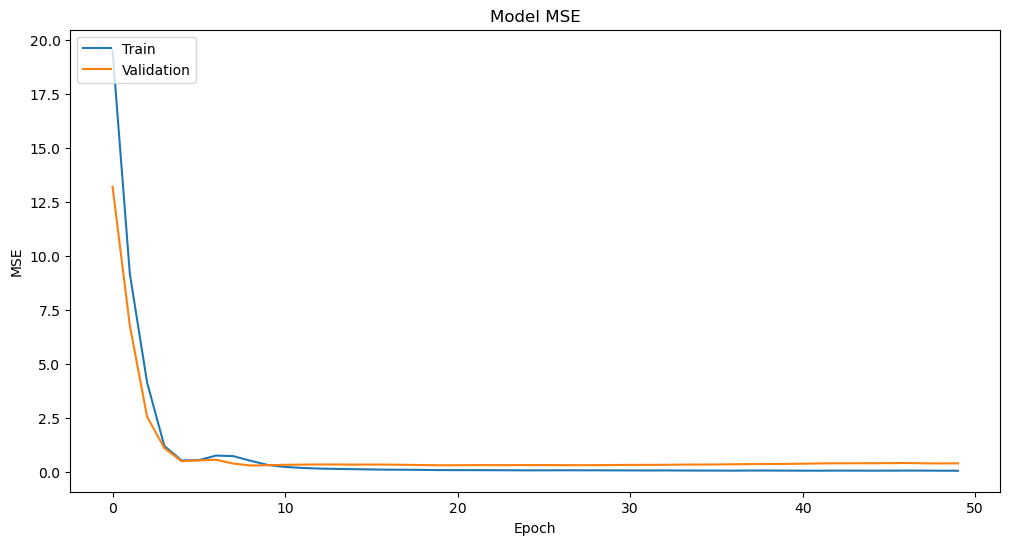

In [32]:
best_params = study.best_params
n_layers = best_params['n_layers']
units = best_params['units']
activation = best_params['activation']
learning_rate = best_params['learning_rate']

model = Sequential()
model.add(Dense(units, input_dim=X_train.shape[1], activation=activation))

for _ in range(n_layers - 1):
    model.add(Dense(units, activation=activation))

model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE with best hyperparameters: ", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 with best hyperparameters: ", r2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()